# Standard deviation vs standard error
Three experiments featuring the calculation of standard deviation and standard error:

- Experiment #1 : throwing a fair die
- Experiment #2 : simple regression
- Experiment #3 : predicting prostate cancer, see "Elements of Statistical Learning" (Hastie et all.) 


In [1]:
import itertools
import matplotlib.pyplot as plt
plt.style.use('tableau')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from numpy.linalg import solve, inv
from scipy import stats

# Experiment #1 : throwing a fair die

In [2]:
# calculate population mean and standard deviation
N = 6
outcomes = np.arange(1, N + 1)
mu, mu_check1 = outcomes.mean(), (N + 1) / 2
variance = sum((outcomes - mu)**2) / N
var, var_check1, var_check2 = variance, outcomes.var(ddof=0), (N**2 - 1) / 12
print('pop. mean (manual)                                            : {}'.format(mu))
print('pop. mean (check based on uniform distribution)               : {}\n'.format(mu_check1))      
print('pop. variance (manual)                                        : {}'.format(var))
print('pop. variance (check numpy)                                   : {}'.format(var_check1))
print('pop. variance (check based on uniform distribution)           : {}\n'.format(var_check2))
print('pop. standard deviation                                       : {}\n'.format(np.sqrt(var)))

pop. mean (manual)                                            : 3.5
pop. mean (check based on uniform distribution)               : 3.5

pop. variance (manual)                                        : 2.9166666666666665
pop. variance (check numpy)                                   : 2.9166666666666665
pop. variance (check based on uniform distribution)           : 2.9166666666666665

pop. standard deviation                                       : 1.707825127659933



In [3]:
# calculate standard error of sample mean and sample variance (sigma known)

def se_of_mean(n, std):
    """ Return standard error of mean
    
    Parameters
    ----------
    n : int
         Sample size
    std : float
         Standard deviation
    """
    return std / np.sqrt(n)

def se_of_variance(n, std, mu4):
    """ Return standard error of the variance
    
    Parameters
    ----------
    n : int
         Sample size
    std : float
         Standard deviation
    mu4 : 4th moment
    """
    variance_of_variance = (mu4 - (n - 3) / (n - 1) * std**4) / n
    return np.sqrt(variance_of_variance)


n = 5 # sample size

mu4 = np.mean([(item - mu)**4 for item in outcomes])
std = outcomes.std(ddof=0)
print('The s.e. of the sample mean      (n = {}) : {}'.format(n, se_of_mean(n, std)))
print('The s.e. of the sample variance  (n = {}) : {}'.format(n, se_of_variance(n, std, mu4) ))

The s.e. of the sample mean      (n = 5) : 0.7637626158259733
The s.e. of the sample variance  (n = 5) : 1.447459460188398


In [4]:
def throw_die(n, seed=None):
    """ Generate observations by throwing die n times
    """
    N = 6
    np.random.seed(seed)
    return np.random.randint(1, N + 1, size=n)
    
# s.e. of sample mean for sample variance (n = 5)
n = 5
sample5 = throw_die(n, seed=1234567)
print('*** sample size {} : {}'.format(n, sample5))
mu = sample5.mean()
s2 = sample5.var(ddof=1)
s  = np.sqrt(s2)
mu4 = np.mean([(item - mu)**4 for item in sample5])
se_mu = se_of_mean(n, s)
se_variance = se_of_variance(n, s, mu4)
print('sample mean : {} (s.e. = {})'.format(mu, se_mu))
print('sample variance : {} (s.e. = {})\n'.format(s2, se_variance))

# s.e. of sample mean for sample variance (n = 30)
n = 30
sample100 = throw_die(n, seed=1234567)
print('*** sample size {} : {}'.format(n, sample100))
mu = sample100.mean()
s2 = sample100.var(ddof=1)
s  = np.sqrt(s2)
mu4 = np.mean([(item - mu)**4 for item in sample100])
se_mu = se_of_mean(n, s)
se_variance = se_of_variance(n, s, mu4)
print('sample mean : {} (s.e. = {})'.format(mu, se_mu))
print('sample variance : {} (s.e. = {})'.format(s2, se_variance))


*** sample size 5 : [4 5 6 3 1]
sample mean : 3.8 (s.e. = 0.8602325267042626)
sample variance : 3.7 (s.e. = 1.4580946471337173)

*** sample size 30 : [4 5 6 3 1 6 1 6 3 4 4 6 1 3 6 4 4 3 5 4 2 1 5 5 3 3 5 5 1 1]
sample mean : 3.6666666666666665 (s.e. = 0.3156213843159995)
sample variance : 2.9885057471264362 (s.e. = 0.5056336324770235)


In [5]:
# distribution of the sample mean

# Please note! -- in this cell we calculate all combintations for throwing with n dice.
# The number of combinations increases exponentially with n. Keep n <= 7

n = 7 # sample size

def outcomes_n_dice(n, outcomes):
    """ Return all possible outcomes when throwing die n times
    
    Parameters
    ----------
    n : int
        number of times die is thrown
    outcomes : list
        possible outcomes when throwing die once
    """
    all_outcomes = n * [outcomes]
    return list(itertools.product(*all_outcomes))

def sample_mean_outcomes(n, population_outcomes):
    """ Return all possibele outcomes for the sample mean
    
    Parameters
    ----------
    n : int
        Sample size
    population_outcomes : list
        All possible outcomes of die throwing experiment
    """
    outcomes_n = outcomes_n_dice(n, population_outcomes) 
    return [np.mean(outcome) for outcome in outcomes_n]

def sample_variance_outcomes(n, population_outcomes):
    """ Return all possibele outcomes for the sample variance
    
    Parameters
    ----------
    n : int
        Sample size
    population_outcomes : list
        All possible outcomes of die throwing experiment
    """
    outcomes_n = outcomes_n_dice(n, population_outcomes) 
    return [np.var(outcome, ddof=1) for outcome in outcomes_n]

se_sample_mean = np.std(sample_mean_outcomes(n, outcomes))
se_sample_variance = np.std(sample_variance_outcomes(n, outcomes))

print('The s.e. of the sample mean      (n = {}) : {}'.format(n, se_sample_mean))
print('The s.e. of the sample variance  (n = {}) : {}'.format(n, se_sample_variance))

The s.e. of the sample mean      (n = 7) : 0.6454972243679028
The s.e. of the sample variance  (n = 7) : 1.1375330683024039


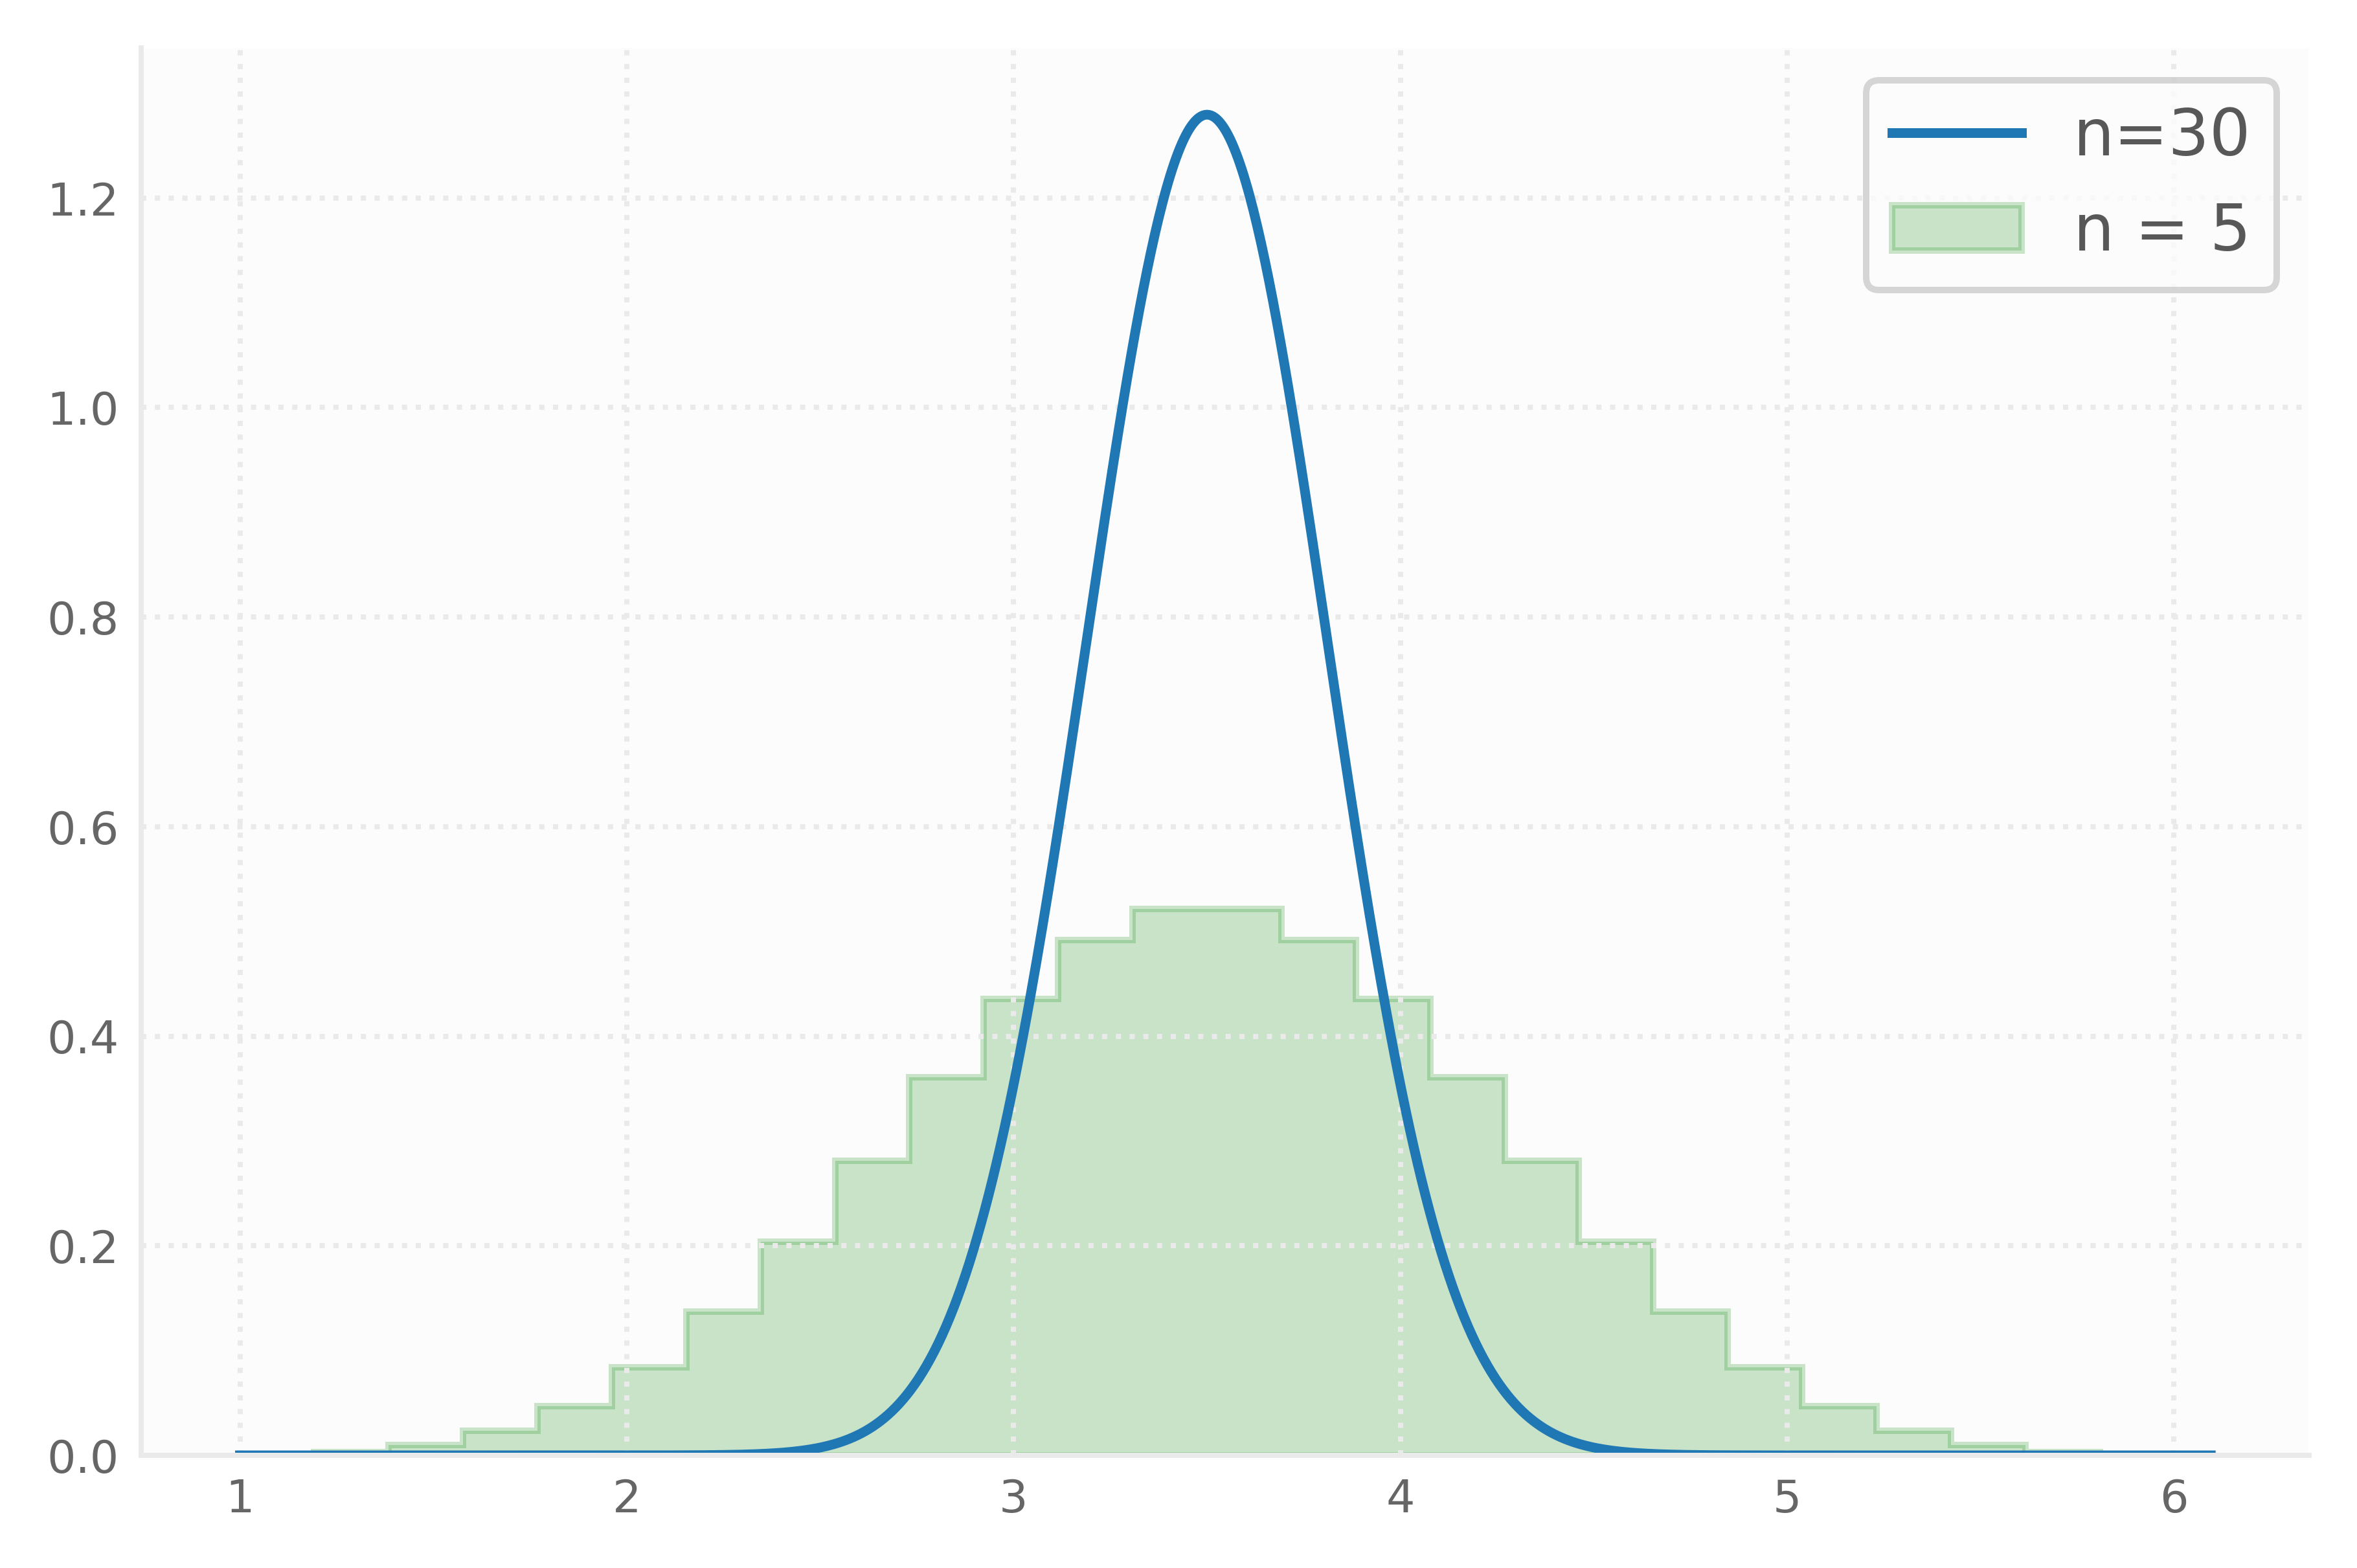

In [15]:
# distribution of the sample mean (plot)
fig, ax = plt.subplots()
fig.set_dpi(720)

n = 5
kwargs = dict(histtype='stepfilled', alpha=0.2, density=True,  bins=26, color='green', edgecolor='green', linewidth=1)  
_ = ax.hist(sample_mean_outcomes(n, outcomes), **kwargs, label='n = 5')

n = 30
xrange = np.arange(1, 6.1, 0.005)
fx = [stats.norm.pdf(x, loc=3.5, scale=1.7078 / np.sqrt(n)) for x in xrange]
_ = ax.plot(xrange, fx, label='n=30')
_ = ax.legend()

# Experiment #2 : simple regression

In [10]:
gmat = [480, 490, 510, 510, 530, 550, 610, 640]
gpa = [2.7, 2.9, 3.3, 2.9, 3.1, 3.0, 3.2, 3.7]
data = pd.DataFrame({'gpa': gpa, 'gmat': gmat})
data.index = 1 + np.arange(8)
data

,gmat,gpa
1,480,2.7
2,490,2.9
3,510,3.3
4,510,2.9
5,530,3.1
6,550,3.0
7,610,3.2
8,640,3.7


In [11]:
# slope and intercept
n = len(data)  # number of observations
xmean = data.gmat.mean()
ymean = data.gpa.mean()
ssxx = sum((data.gmat - xmean)**2)
ssyy = sum((data.gpa - ymean)**2)
ssxy = sum((data.gmat - xmean) * (data.gpa - ymean))
beta = ssxy / ssxx
alpha = ymean - beta * xmean
fitted = alpha  + beta * data.gmat
error = data.gpa - fitted
ss_error = sum(error**2)
se_estimate = np.sqrt(ss_error / (n - 2))
se_beta = se_estimate * np.sqrt((1 / ssxx))
se_alpha = se_beta * np.sqrt(sum(data.gmat**2))
yhat = lambda x: alpha + beta * x
se_forecast = lambda x: se_estimate * np.sqrt(1 + (1/n) + (x - xmean)**2 / (ssxx))
se_forecast_mean = lambda x: se_estimate * np.sqrt((1/n) + (x - xmean)**2 / (ssxx))

print('s.e. of the estimate = {}'.format(se_estimate))
print('intercept alpha          : {} (s.e. = {})'.format(alpha, se_alpha))
print('slope beta               : {} (s.e. = {})'.format(beta, se_beta))   
print('forecast @ gmat=500      : {} (s.e. = {})'.format(yhat(500), se_forecast(500)))
print('forecast mean @ gmat=500 : {} (s.e. = {})'.format(yhat(500), se_forecast_mean(500)))

s.e. of the estimate = 0.19374269504695635
intercept alpha          : 0.7521739130434772 (s.e. = 1.9607879413584428)
slope beta               : 0.004347826086956523 (s.e. = 0.0012775014997703767)
forecast @ gmat=500      : 2.9260869565217384 (s.e. = 0.21175333999875906)
forecast mean @ gmat=500 : 2.9260869565217384 (s.e. = 0.08545902595145898)


Text(0.5,1,'Standard error and forecast intervals')

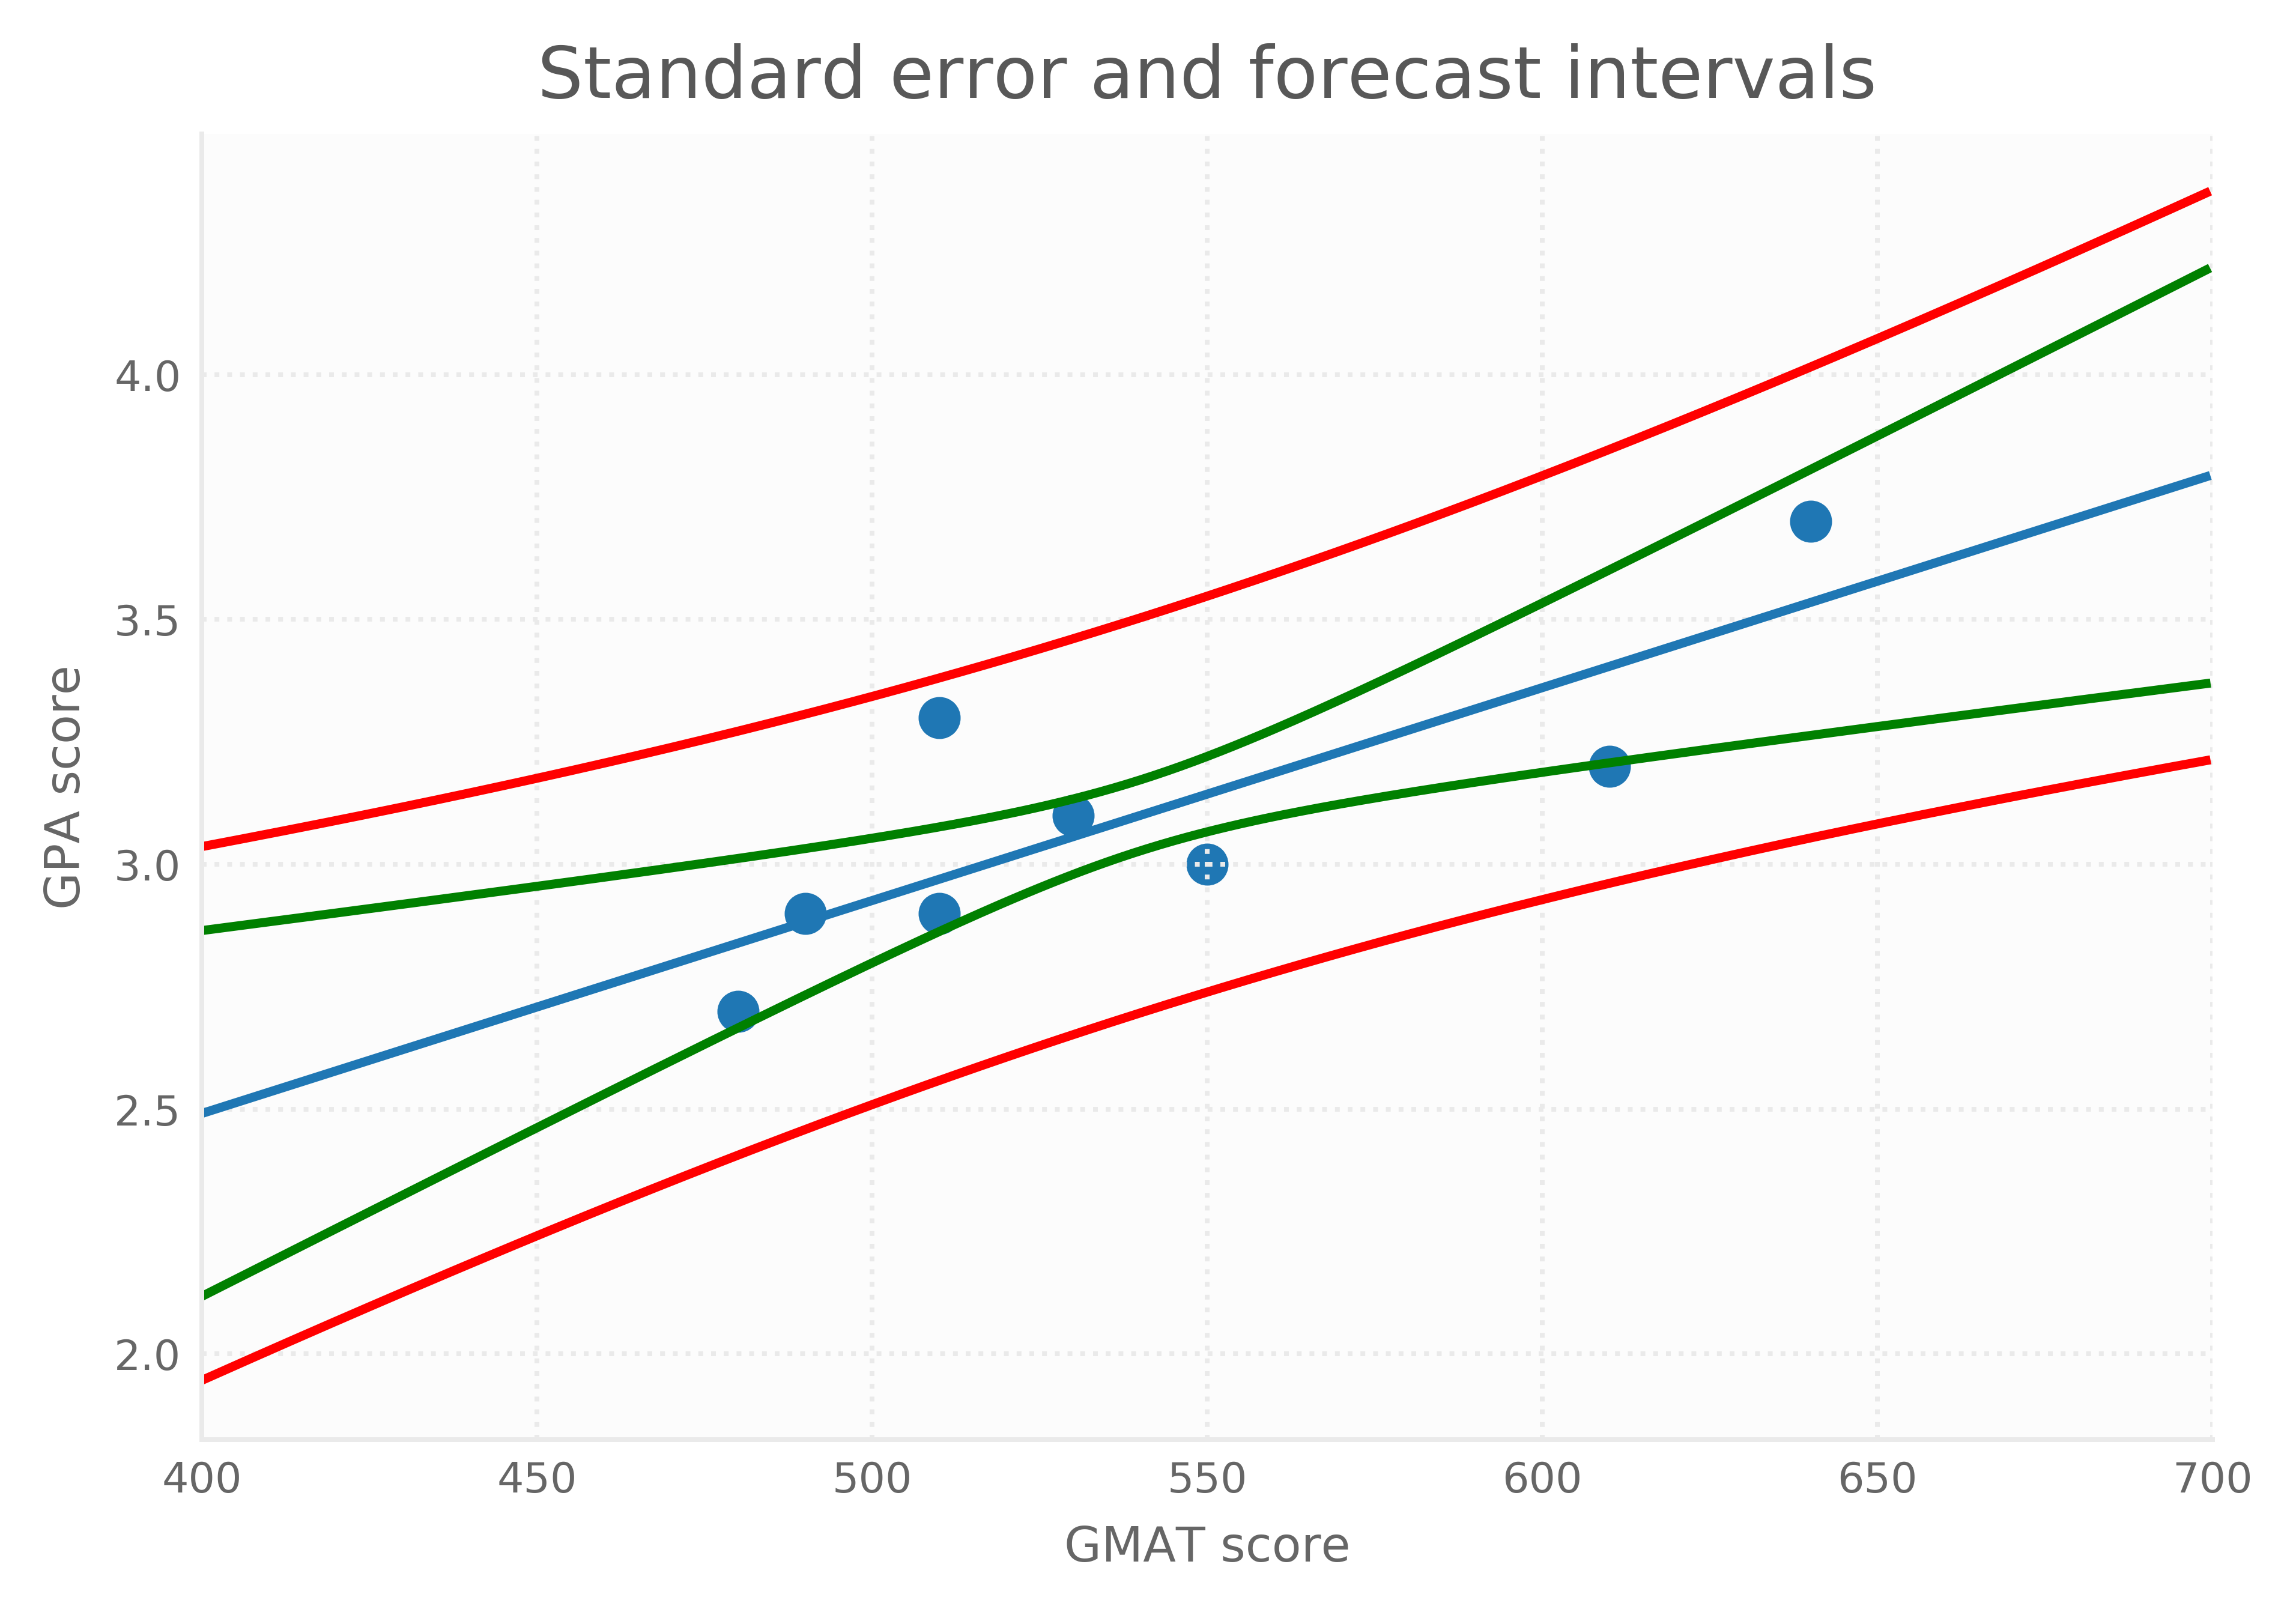

In [16]:
# plot regression
tvalue = stats.t.ppf(0.975, df=n - 2)
xvals = np.arange(400, 700)
yhat = alpha + beta * xvals
forecast_lower = yhat - tvalue * np.array([se_forecast(x) for x in xvals])
forecast_upper = yhat + tvalue * np.array([se_forecast(x) for x in xvals])
forecast_mean_lower = yhat - tvalue * np.array([se_forecast_mean(x) for x in xvals])
forecast_mean_upper = yhat + tvalue * np.array([se_forecast_mean(x) for x in xvals])
fig, ax = plt.subplots()
fig.set_dpi(720)
ax.scatter(data.gmat, data.gpa)
ax.plot(xvals, yhat)
ax.plot(xvals, forecast_mean_lower, color='green')
ax.plot(xvals, forecast_mean_upper, color='green')
ax.plot(xvals, forecast_lower, color='red')
ax.plot(xvals, forecast_upper, color='red')
ax.set_xlim(400, 700)
ax.set_xlabel('GMAT score')
ax.set_ylabel('GPA score')
ax.set_title('Standard error and forecast intervals')


# Experiment #3 : predicting prostate cancer

In [17]:
# read data
data = pd.read_csv('prostate.data', skiprows=22, sep='\t', index_col='case')
# split train / test
train = data[data.train == 'T']
train = train.iloc[:, :-1]  # remove last column
test = data[data.train == 'F']
test = test.iloc[:, :-1]  

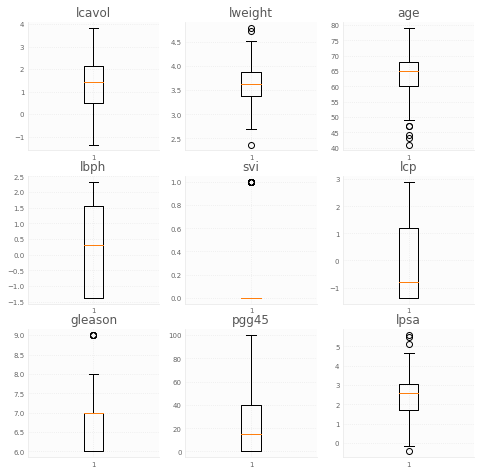

In [18]:
nrows, ncols = 3, 3
fig, ax = plt.subplots(nrows, ncols, figsize=(8, 8))
# fig.set_dpi(360)
for i, col in enumerate(data.columns[:-1]):
    rownr = i // ncols
    colnr = i % ncols
    ax[rownr][colnr].boxplot(data[col])
    ax[rownr][colnr].set_title(col)

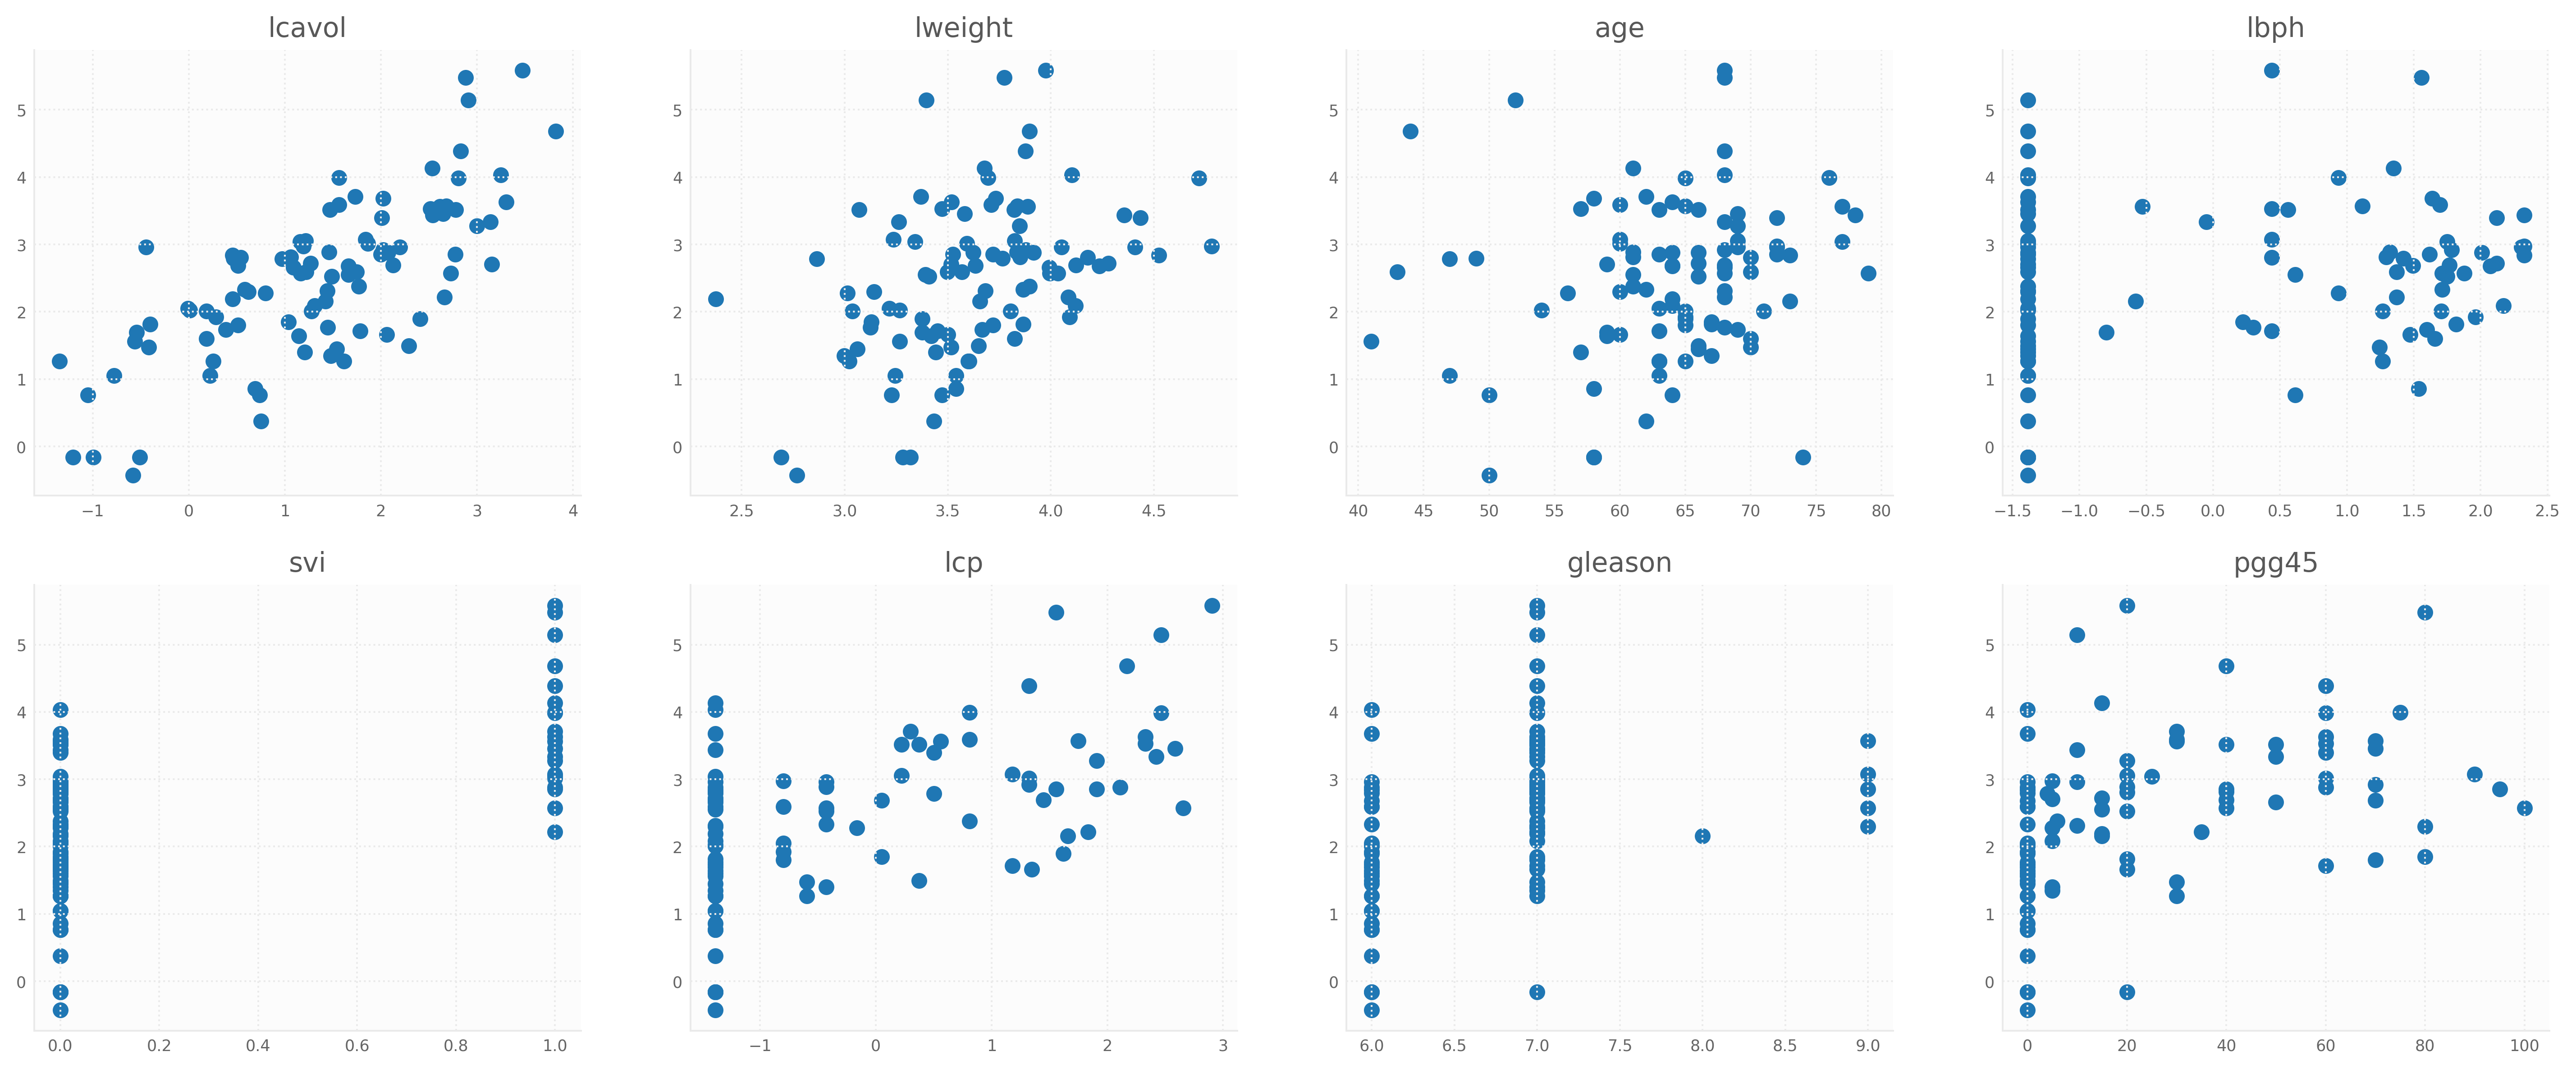

In [19]:
nrows, ncols = 2, 4
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 8))
fig.set_dpi(360)
for i, col in enumerate(data.columns[:-2]):
    rownr = i // ncols
    colnr = i % ncols
    ax[rownr][colnr].scatter(data[col], data.lpsa)
    ax[rownr][colnr].set_title(col)

In [20]:
# standardize design matrix : training samples only!
N = len(train)
X, y = train.iloc[:, :-1], train.iloc[:, -1]
mu_tot    = data.iloc[:, :-2].mean() # data leakage!! --> mean should have been  calculated on training samples only!
sigma_tot = data.iloc[:, :-2].std()  # data leakage!! --> std  should have been  calculated on training samples only!
X = (X - mu_tot) / sigma_tot
p = X.shape[1]
X = pd.concat([pd.DataFrame({'ones': np.ones(N)},
                            index=train.index), X], axis=1)

# OLS (without sklearn)

In [21]:
# correlations between features
correlations = train.iloc[:, :-1].corr().apply(lambda x: round(x, 3))
correlations

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000,0.300,0.286,0.063,0.593,0.692,0.426,0.483
lweight,0.300,1.000,0.317,0.437,0.181,0.157,0.024,0.074
age,0.286,0.317,1.000,0.287,0.129,0.173,0.366,0.276
lbph,0.063,0.437,0.287,1.000,-0.139,-0.089,0.033,-0.030
svi,0.593,0.181,0.129,-0.139,1.000,0.671,0.307,0.481
lcp,0.692,0.157,0.173,-0.089,0.671,1.000,0.476,0.663
gleason,0.426,0.024,0.366,0.033,0.307,0.476,1.000,0.757
pgg45,0.483,0.074,0.276,-0.030,0.481,0.663,0.757,1.000


In [22]:
# estimated coefficients
beta_ols = solve(X.T @ X, X.T @ y)
print('*** Estimated coefficients according to The Elements of Statistical Learning (see Table 3.3) ***\n')
print('estimated beta coefficients: {}'.format(np.round(beta_ols, 3)))

# standard errors coefficients (for testing on significance)
yhat = X @ beta_ols
error = y - yhat
sigma2 = np.dot(error, error) / (N - p - 1)
varcov = sigma2 * inv(X.T @ X)
std_errors = np.sqrt(np.diag(varcov))
print('std. error beta\'s = {}'.format(np.round(std_errors, 2)))
zscores = [b / s for b, s in zip(beta_ols, std_errors)]
print('z-scores = {}'.format(np.round(zscores, 2)))
print('\nsigma2 = {}'.format(sigma2))

# mean prediction error on the test set (a.k.a. test error) and its standard error
N_test = len(test)
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]
X_test = (X_test - mu_tot) / sigma_tot # again: some data leakage seems to occur at this point
X_test = pd.concat([pd.DataFrame({'ones': np.ones(N_test)},
                                  index=test.index), X_test], axis=1)
predictions = X_test @ beta_ols
perror =  y_test - predictions
perror2 = perror * perror
ss = np.sum(perror2)
test_error =  ss / N_test
print('\nmean prediction error (a.k.a. test error) = {}'.format(test_error))
std_error = perror2.std() / np.sqrt(N_test)
print('standard error of this test error = {}'.format(std_error))

# base error rate
dev_from_mean = y_test - train.iloc[:, -1].mean()  
dev_from_mean2 = dev_from_mean * dev_from_mean 
base_error = sum(dev_from_mean2) / N_test
print('\nbases error rate = {}'.format(base_error))
std_error_base = dev_from_mean2.std() / np.sqrt(N_test)
print('standard error of this base error rate = {}'.format(std_error_base))

*** Estimated coefficients according to The Elements of Statistical Learning (see Table 3.3) ***

estimated beta coefficients: [ 2.465  0.68   0.263 -0.141  0.21   0.305 -0.288 -0.021  0.267]
std. error beta's = [0.09 0.13 0.1  0.1  0.1  0.12 0.15 0.15 0.15]
z-scores = [27.6   5.37  2.75 -1.4   2.06  2.47 -1.87 -0.15  1.74]

sigma2 = 0.5073514562053172

mean prediction error (a.k.a. test error) = 0.5212740055076003
standard error of this test error = 0.178723951969371

bases error rate = 1.056733228060382
standard error of this base error rate = 0.39611496227634135


In [23]:
# Isolate calculation for the test error and its s.e.
perror2 = (y_test - predictions)**2
test_error = sum(perror2) / N_test
std_error_test_error = perror2.std() / np.sqrt(N_test)
print('Test error        : {} (s.e. = {})'.format(test_error, std_error_test_error))
std_error_test_error_check = np.sqrt(sum((perror2 - test_error)**2) / (N_test - 1)) / np.sqrt(N_test)
print('Test error (check): {} (s.e. = {})'.format(test_error, std_error_test_error_check))

Test error        : 0.5212740055076003 (s.e. = 0.178723951969371)
Test error (check): 0.5212740055076003 (s.e. = 0.178723951969371)


Text(5,2.1,'target average')

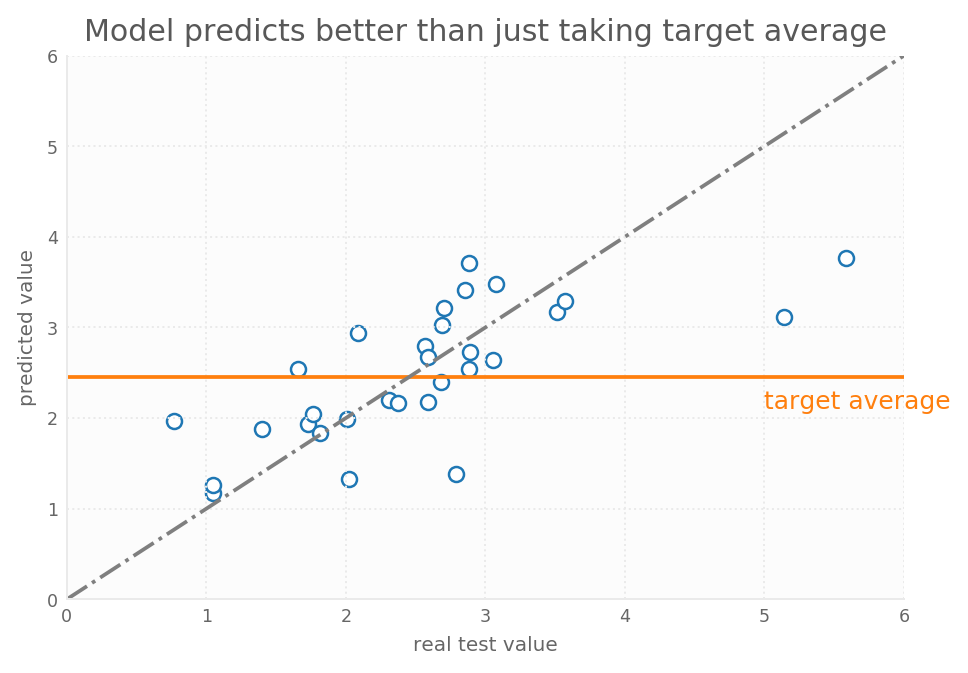

In [24]:
# Fortunately, model predicts better than just using the target average
MAX = 6
fig, ax = plt.subplots()
fig.set_dpi(180)
ax.scatter(y_test, predictions, facecolor='white', edgecolor='tab:blue')
ax.plot([0, MAX], [0, MAX], linestyle='-.', color='tab:grey')
ax.set_xlim(0, MAX)
ax.set_ylim(0, MAX)
ax.hlines(y.mean(), 0, MAX, color='tab:orange')
ax.set_xlabel('real test value')
ax.set_ylabel('predicted value')
ax.set_title('Model predicts better than just taking target average')
ax.annotate('target average', (5, 2.1), color='tab:orange')

# OLS (with sklearn)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [26]:
ols = LinearRegression(fit_intercept=False)

# fit
ols.fit(X, y)  # we reuse (with data leakage) standardize data
beta_ols = ols.coef_
print('OLS estimated coefficients: {}'.format(np.round(beta_ols, 3)))

# evaluate
yhat = ols.predict(X)
sigma2 = sum((y - yhat) * (y - yhat)) / (N - p - 1)
cov_beta = sigma2 * inv(X.T @ X)
std_error_beta = np.sqrt(np.diag(cov_beta))
z_scores = beta_ols / std_error_beta
print('OLS coefficients std. error: {}'.format(np.round(std_error_beta, 3)))
print('OLS coefficients zscores: {}'.format(np.round(z_scores, 3)))
r_squared = ols.score(X, y)
print('in sample R2 = {}'.format(r_squared))

# cross validate on training set
scores = cross_val_score(ols, X, y, cv=67, scoring='neg_mean_squared_error')
print('\ncv error = {}'.format(-scores.mean()))
print('std. cv error = {}'.format(scores.std()))


# validate on test set
predictions = ols.predict(X_test)
ss_total = sum((y_test - y_test.mean()) * (y_test - y_test.mean())) 
r_squared = ols.score(X_test, y_test)
test_error = (1 - r_squared) * ss_total / N_test
print('\nout of sample R2 = {}'.format(r_squared))
print('test_error = {}'.format(test_error))
deviation = predictions - y_test
deviation2 = deviation**2
std_test_error = deviation2.std() / np.sqrt(N_test)
print('std of test error = {}'.format(std_test_error))
print('\nbase error rate = {}'.format(ss_total / N_test ))
deviation = y_test.mean() - y_test
deviation2 = deviation**2
std_base_error = deviation2.std() / np.sqrt(N_test)
print('std. of base error = {}'.format(std_base_error))

OLS estimated coefficients: [ 2.465  0.68   0.263 -0.141  0.21   0.305 -0.288 -0.021  0.267]
OLS coefficients std. error: [0.089 0.127 0.096 0.101 0.102 0.124 0.155 0.145 0.154]
OLS coefficients zscores: [27.598  5.366  2.751 -1.396  2.056  2.469 -1.867 -0.147  1.738]
in sample R2 = 0.6943711796768237

cv error = 0.5839552308236675
std. cv error = 0.8866234636418465

out of sample R2 = 0.503379850238182
test_error = 0.521274005507599
std of test error = 0.17872395196936972

base error rate = 1.049643285230382
std. of base error = 0.37857556169917284
